# Decision trees: cancer dataset

## Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
cancer = load_breast_cancer()
print("cancer keys: \n{}".format(cancer.keys()))

cancer keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                   test_size=0.25, random_state=42)

In [20]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [21]:
print("train set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.937


An perfect accuracy on the training set reflects the presence of pure leaves. 
In other words, the tree has grown deep enough so that each leaf has datapoints of only one class,
meaning that the classifier perfectly memorized the whole training set and it is overfitting.

In [26]:
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [27]:
print("train set accuracy: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree_pruned.score(X_test, y_test)))

train set accuracy: 0.988
test set accuracy: 0.951


### Visualizing the tree

In [28]:
from sklearn.tree import export_graphviz

In [31]:
export_graphviz(tree_pruned, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

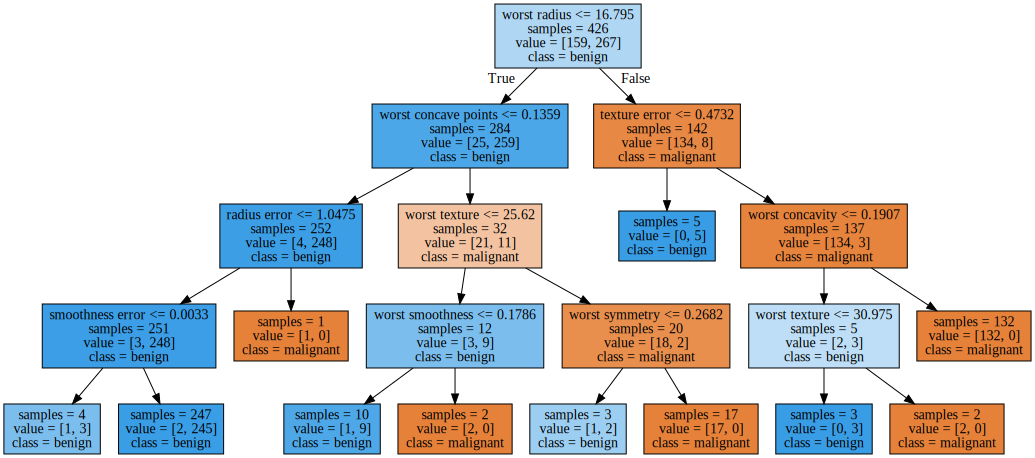

In [38]:
import graphviz

with open("tree.dot") as image:
    dot_graph = image.read()
graphviz.Source(dot_graph)

#graphviz.Source(open("tree.dot").read())

### Feature importance

In [65]:
print("Feature importances: \n{}".format(tree_pruned.feature_importances_))

Feature importances: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


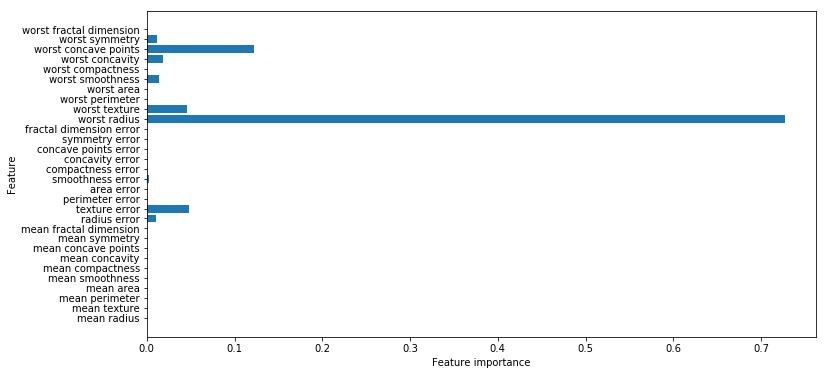

In [67]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(12,6))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree_pruned)

### Using GridSearchCV to tune parameters

In [13]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {"max_depth":[1,2,3,4,5],
              "max_leaf_nodes":[None,2,3,4,5]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'max_leaf_nodes': [None, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
print("Best parameters: {}".format(grid.best_params_))
print("train set score: {:.3f}".format(grid.score(X_train, y_train)))
print("test set score: {:.3f}".format(grid.score(X_test, y_test)))

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5}
train set score: 0.972
test set score: 0.944
